In [44]:
import pandas as pd
import numpy as np
import yfinance as yf
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [45]:
start = '2020-01-01'
end = '2024-12-31'
seq_length = 50

df = yf.download("AAPL", start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


In [46]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500


In [47]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
1,2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2,2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
3,2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
4,2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


In [48]:
close_prices = df['Close'].values.reshape(-1, 1)


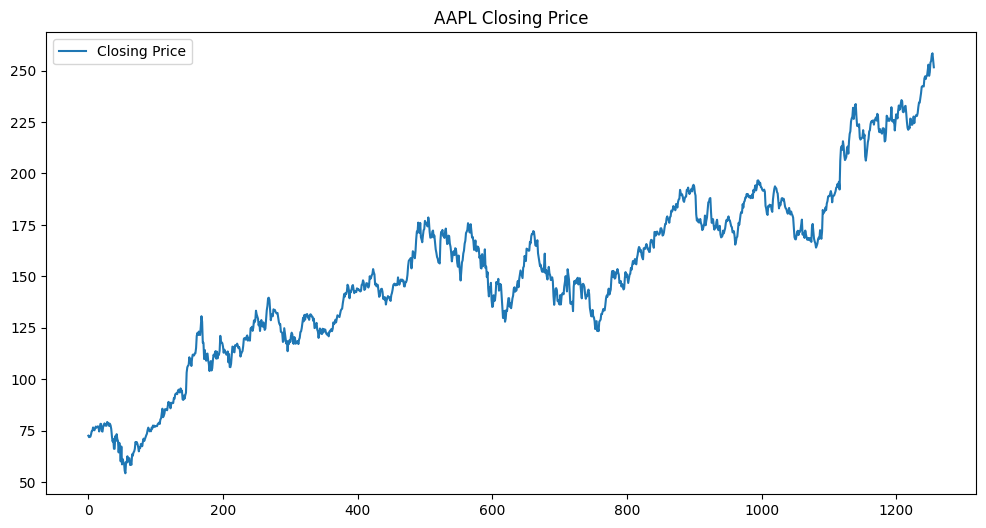

In [49]:
# Plot closing prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('AAPL Closing Price')
plt.legend()
plt.show()


In [50]:
# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [51]:
# Prepare sequences
X, y = [], []
for i in range(seq_length, len(scaled_data)):
    X.append(scaled_data[i - seq_length:i].flatten())
    y.append(scaled_data[i][0])
X, y = np.array(X), np.array(y)

In [52]:
# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [53]:
# Save The Model

# Save the model and scaler
joblib.dump(model, "../models/rf_stock_model.joblib")
joblib.dump(scaler, "../models/scaler.joblib")

['../models/scaler.joblib']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Predict
y_pred = model.predict(X_test)

In [55]:
# Inverse transform predictions (no scaling needed here)
# But we can calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

MSE: 0.0000
RMSE: 0.0057
MAE: 0.0042
R² Score: 0.9980


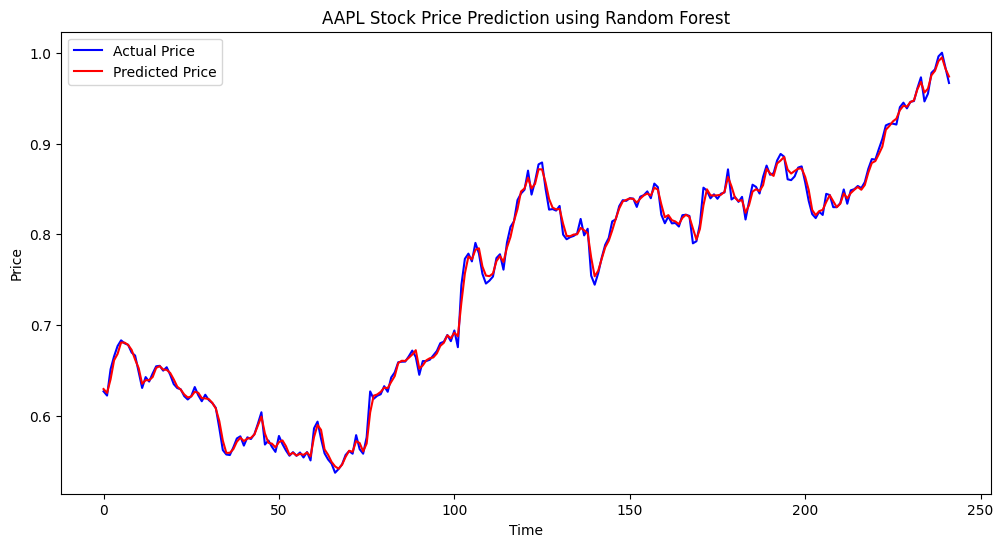

In [56]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('AAPL Stock Price Prediction using Random Forest')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()